<a href="https://colab.research.google.com/github/ALXAVIER-DEV/Spark/blob/master/Spark_regress%E2%95%9Eo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 1 - Preparando os Dados**

## **Preparando o Ambiente**

### [PySpark](https://spark.apache.org/docs/latest/api/python/index.html)

PySpark é uma interface para Apache Spark em Python. Ele não apenas permite que você escreva aplicativos Spark usando APIs Python, mas também fornece o *shell* PySpark para analisar interativamente seus dados em um ambiente distribuído. O PySpark oferece suporte à maioria dos recursos do Spark, como Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) e Spark Core.

<center><img src="https://caelum-online-public.s3.amazonaws.com/2273-introducao-spark/01/img-001.png"/></center>

#### **Spark SQL e DataFrame**

Spark SQL é um módulo Spark para processamento de dados estruturados. Ele fornece uma abstração de programação chamada DataFrame e também pode atuar como mecanismo de consulta SQL distribuído.

#### **Spark Streaming**

Executando em cima do Spark, o recurso de *streaming* no Apache Spark possibilita o uso de poderosas aplicações interativas e analíticas em *streaming* e dados históricos, enquanto herda a facilidade de uso do Spark e as características de tolerância a falhas.

#### **Spark MLlib**

Construído sobre o Spark, MLlib é uma biblioteca de aprendizado de máquina escalonável que fornece um conjunto uniforme de APIs de alto nível que ajudam os usuários a criar e ajustar *pipelines* de aprendizado de máquina práticos.

#### **Spark Core**

Spark Core é o mecanismo de execução geral subjacente para a plataforma Spark sobre o qual todas as outras funcionalidades são construídas. Ele fornece um RDD (*Resilient Distributed Dataset*) e recursos de computação na memória.

In [3]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=6a45dbf90434dca62694426dc56d3cd4847d0cc2c31a8644a3a056f894844100
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


### [SparkSession](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.SparkSession.html)

O ponto de entrada para programar o Spark com a API Dataset e DataFrame.

Uma SparkSession pode ser utilizada para criar DataFrames, registrar DataFrames como tabelas, executar consultas SQL em tabelas, armazenar em cache e ler arquivos parquet. Para criar uma SparkSession, use o seguinte padrão de construtor:

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName('Regressao com Spark') \
    .getOrCreate()

spark

**Carregamento dos Dados**

### Montando o drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = spark.read.json('/content/drive/MyDrive/Spark-Regressao/imoveis.json')

In [7]:
data

DataFrame[ident: struct<customerID:string,source:string>, listing: struct<address:struct<city:string,location:struct<lat:double,lon:double>,neighborhood:string,zone:string>,features:struct<bathrooms:bigint,bedrooms:bigint,floors:bigint,parkingSpaces:bigint,suites:bigint,totalAreas:string,unitFloor:bigint,unitsOnTheFloor:bigint,usableAreas:string>,prices:struct<price:string,tax:struct<condo:string,iptu:string>>,types:struct<unit:string,usage:string>>]

In [8]:
data.show(10,False)

+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|ident                     |listing                                                                                                                                                          |
+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|{775564-BOJSMVON, Website}|{{Rio de Janeiro, {-22.909429, -43.413557}, Taquara, Zona Oeste}, {0, 0, 0, 1, 0, 62, 0, 0, 62}, {45000, {150, 0}}, {Outros, Residencial}}                       |
|{660895-AUENKNYY, Website}|{{Rio de Janeiro, {-22.869698, -43.509141}, Santíssimo, Zona Oeste}, {1, 2, 0, 1, 0, 0, 0, 0, 44}, {45000, {120, 0}}, {Apartamento, Residencial}}                |
|{751522-JESYFEQL, Website}|{{Rio de Janeiro,

In [9]:
data.count()

73615

## **Seleção de *Features***

In [10]:
data.printSchema()

root
 |-- ident: struct (nullable = true)
 |    |-- customerID: string (nullable = true)
 |    |-- source: string (nullable = true)
 |-- listing: struct (nullable = true)
 |    |-- address: struct (nullable = true)
 |    |    |-- city: string (nullable = true)
 |    |    |-- location: struct (nullable = true)
 |    |    |    |-- lat: double (nullable = true)
 |    |    |    |-- lon: double (nullable = true)
 |    |    |-- neighborhood: string (nullable = true)
 |    |    |-- zone: string (nullable = true)
 |    |-- features: struct (nullable = true)
 |    |    |-- bathrooms: long (nullable = true)
 |    |    |-- bedrooms: long (nullable = true)
 |    |    |-- floors: long (nullable = true)
 |    |    |-- parkingSpaces: long (nullable = true)
 |    |    |-- suites: long (nullable = true)
 |    |    |-- totalAreas: string (nullable = true)
 |    |    |-- unitFloor: long (nullable = true)
 |    |    |-- unitsOnTheFloor: long (nullable = true)
 |    |    |-- usableAreas: string (nullable =

In [11]:
data\
    .select('ident.customerID', 'listing.*') \
    .toPandas()


,customerID,address,features,prices,types
0,775564-BOJSMVON,"(Rio de Janeiro, (-22.909429, -43.413557), Taq...","(0, 0, 0, 1, 0, 62, 0, 0, 62)","(45000, (150, 0))","(Outros, Residencial)"
1,660895-AUENKNYY,"(Rio de Janeiro, (-22.869698, -43.509141), San...","(1, 2, 0, 1, 0, 0, 0, 0, 44)","(45000, (120, 0))","(Apartamento, Residencial)"
2,751522-JESYFEQL,"(Rio de Janeiro, (-22.986927, -43.646786), Ped...","(0, 0, 0, 0, 0, 132, 0, 0, 132)","(50000, (100, 0))","(Outros, Residencial)"
3,714052-GAAEWYKS,"(Rio de Janeiro, (-22.881977, -43.330818), Cas...","(1, 0, 0, 0, 0, 32, 3, 0, 32)","(45000, (468, 346))","(Outros, Comercial)"
4,568886-ZIBFOMCC,"(Rio de Janeiro, (-23.027653, -43.480742), Rec...","(2, 3, 3, 1, 1, 0, 2, 4, 60)","(50000, (400, 120))","(Apartamento, Residencial)"
...,...,...,...,...,...
73610,134148-MJIBCMDQ,"(Rio de Janeiro, (-23.00396, -43.388906), Barr...","(10, 5, 0, 4, 1, 1024, 0, 0, 1024)","(10000000, (2350, 2900))","(Casa, Residencial)"
73611,541465-QBQVXXXZ,"(Rio de Janeiro, (-23.000902, -43.395032), Bar...","(7, 5, 0, 6, 5, 1250, 0, 0, 750)","(10000000, (3000, 15000))","(Casa, Residencial)"
73612,800542-BZREFTQS,"(Rio de Janeiro, (-22.987018, -43.189682), Cop...","(5, 4, 0, 3, 4, 328, 0, 0, 328)","(10000000, (None, None))","(Apartamento, Residencial)"
73613,939419-ECGUNTIH,"(Rio de Janeiro, (-23.005037, -43.351836), Bar...","(10, 5, 0, 4, 5, 1024, 3, 0, 1024)","(10000000, (2400, 35000))","(Casa, Residencial)"


In [12]:
data\
    .select('ident.customerID', 'listing.types.*', 'listing.features.*', 'listing.address.*', 'listing.prices.price', 'listing.prices.tax.*') \
    .show(truncate=False)

+---------------+-----------+-----------+---------+--------+------+-------------+------+----------+---------+---------------+-----------+--------------+------------------------+------------------------+------------+-----+-----+----+
|customerID     |unit       |usage      |bathrooms|bedrooms|floors|parkingSpaces|suites|totalAreas|unitFloor|unitsOnTheFloor|usableAreas|city          |location                |neighborhood            |zone        |price|condo|iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+----------+---------+---------------+-----------+--------------+------------------------+------------------------+------------+-----+-----+----+
|775564-BOJSMVON|Outros     |Residencial|0        |0       |0     |1            |0     |62        |0        |0              |62         |Rio de Janeiro|{-22.909429, -43.413557}|Taquara                 |Zona Oeste  |45000|150  |0   |
|660895-AUENKNYY|Apartamento|Residencial|1        |2       |0     |1

In [13]:
data\
    .select('ident.customerID', 'listing.types.*', 'listing.features.*', 'listing.address.*', 'listing.prices.price', 'listing.prices.tax.*') \
    .drop('city','location', 'totalAreas') \
    .show(truncate=False)

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+------------------------+------------+-----+-----+----+
|customerID     |unit       |usage      |bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|neighborhood            |zone        |price|condo|iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+------------------------+------------+-----+-----+----+
|775564-BOJSMVON|Outros     |Residencial|0        |0       |0     |1            |0     |0        |0              |62         |Taquara                 |Zona Oeste  |45000|150  |0   |
|660895-AUENKNYY|Apartamento|Residencial|1        |2       |0     |1            |0     |0        |0              |44         |Santíssimo              |Zona Oeste  |45000|120  |0   |
|751522-JESYFEQL|Outros     |Residencial|0        |0       |0     |0            |0     |0 

In [14]:
dataset = data\
    .select('ident.customerID', 'listing.types.*', 'listing.features.*', 'listing.address.*', 'listing.prices.price', 'listing.prices.tax.*') \
    .drop('city','location', 'totalAreas') \
    #.show(truncate=False)

## **Tratamento de Dados**

In [15]:
dataset.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- usage: string (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- parkingSpaces: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- unitFloor: long (nullable = true)
 |-- unitsOnTheFloor: long (nullable = true)
 |-- usableAreas: string (nullable = true)
 |-- neighborhood: string (nullable = true)
 |-- zone: string (nullable = true)
 |-- price: string (nullable = true)
 |-- condo: string (nullable = true)
 |-- iptu: string (nullable = true)



In [16]:
from pyspark.sql.types import IntegerType, DoubleType


In [17]:
dataset\
    .withColumn('usableAreas', dataset['usableAreas'].cast(IntegerType())) \
    .withColumn('price', dataset['price'].cast(DoubleType())) \
    .withColumn('condo', dataset['condo'].cast(DoubleType())) \
    .withColumn('iptu', dataset['iptu'].cast(DoubleType())) \
    .printSchema()


root
 |-- customerID: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- usage: string (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- parkingSpaces: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- unitFloor: long (nullable = true)
 |-- unitsOnTheFloor: long (nullable = true)
 |-- usableAreas: integer (nullable = true)
 |-- neighborhood: string (nullable = true)
 |-- zone: string (nullable = true)
 |-- price: double (nullable = true)
 |-- condo: double (nullable = true)
 |-- iptu: double (nullable = true)



In [18]:
dataset =dataset\
    .withColumn('usableAreas', dataset['usableAreas'].cast(IntegerType())) \
    .withColumn('price', dataset['price'].cast(DoubleType())) \
    .withColumn('condo', dataset['condo'].cast(DoubleType())) \
    .withColumn('iptu', dataset['iptu'].cast(DoubleType()))


In [19]:
dataset.show()

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+------+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|  price|condo|  iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+------+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000.0|150.0|   0.0|
|660895-AUENKNYY|Apartamento|Residencial|        1|       2|     0|            1|     0|        0|              0|         44|          Santíssimo|  Zona Oeste|45000.0|120.0|   0.0|
|751522-JESYFEQL|     Outros|Residencial|        0|       0|     0|            0|     0|  

In [20]:
dataset\
    .select('usage') \
    .groupBy('usage')\
    .count()\
    .show()

+-----------+-----+
|      usage|count|
+-----------+-----+
|  Comercial| 4019|
|Residencial|69596|
+-----------+-----+



In [21]:
dataset = dataset\
    .select('*')\
    .where('usage =="Residencial"')


In [22]:
dataset\
    .select('unit')\
    .groupBy('unit')\
    .count()\
    .show()

+-----------+-----+
|       unit|count|
+-----------+-----+
|     Outros| 1190|
|Apartamento|59106|
|       Casa| 9300|
+-----------+-----+



In [23]:
dataset\
    .select('zone')\
    .groupBy('zone')\
    .count()\
    .show()


+------------+-----+
|        zone|count|
+------------+-----+
|  Zona Norte|14379|
|  Zona Oeste|35523|
|Zona Central| 1002|
|    Zona Sul|18535|
|            |  157|
+------------+-----+



### Tratamento para dados faltantes

[Functions](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html#functions)


In [24]:
from pyspark.sql import functions as f

In [25]:
dataset.show()


+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|  price|condo| iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000.0|150.0|  0.0|
|660895-AUENKNYY|Apartamento|Residencial|        1|       2|     0|            1|     0|        0|              0|         44|          Santíssimo|  Zona Oeste|45000.0|120.0|  0.0|
|751522-JESYFEQL|     Outros|Residencial|        0|       0|     0|            0|     0|       

In [26]:
dataset\
    .select([f.count(f.when(f.isnan(c) | f.isnull(c), True)).alias(c) for c in dataset.columns])\
    .show()


+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+
|customerID|unit|usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|neighborhood|zone|price|condo|iptu|
+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+
|         0|   0|    0|        0|       0|     0|            0|     0|        0|              0|          0|           0|   0|    0| 6061|8726|
+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+



In [27]:
dataset\
    .select('*')\
    .na\
    .fill(0)\
    .show()

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|  price|condo| iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000.0|150.0|  0.0|
|660895-AUENKNYY|Apartamento|Residencial|        1|       2|     0|            1|     0|        0|              0|         44|          Santíssimo|  Zona Oeste|45000.0|120.0|  0.0|
|751522-JESYFEQL|     Outros|Residencial|        0|       0|     0|            0|     0|       

In [28]:
dataset = dataset\
    .select('*')\
    .na\
    .fill(0)


In [29]:
dataset\
    .select('zone')\
    .groupBy('zone')\
    .count()\
    .show()

+------------+-----+
|        zone|count|
+------------+-----+
|  Zona Norte|14379|
|  Zona Oeste|35523|
|Zona Central| 1002|
|    Zona Sul|18535|
|            |  157|
+------------+-----+



In [30]:
dataset =dataset\
    .where(f.col('zone') != '')

In [31]:
dataset.show()

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|  price|condo| iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000.0|150.0|  0.0|
|660895-AUENKNYY|Apartamento|Residencial|        1|       2|     0|            1|     0|        0|              0|         44|          Santíssimo|  Zona Oeste|45000.0|120.0|  0.0|
|751522-JESYFEQL|     Outros|Residencial|        0|       0|     0|            0|     0|       

# **Aula 2 - Regressão Linear**

[Documentação da Biblioteca Pyspark ML](https://spark.apache.org/docs/2.3.1/api/python/pyspark.ml.html)

### **Processos de Machine Learning**
::

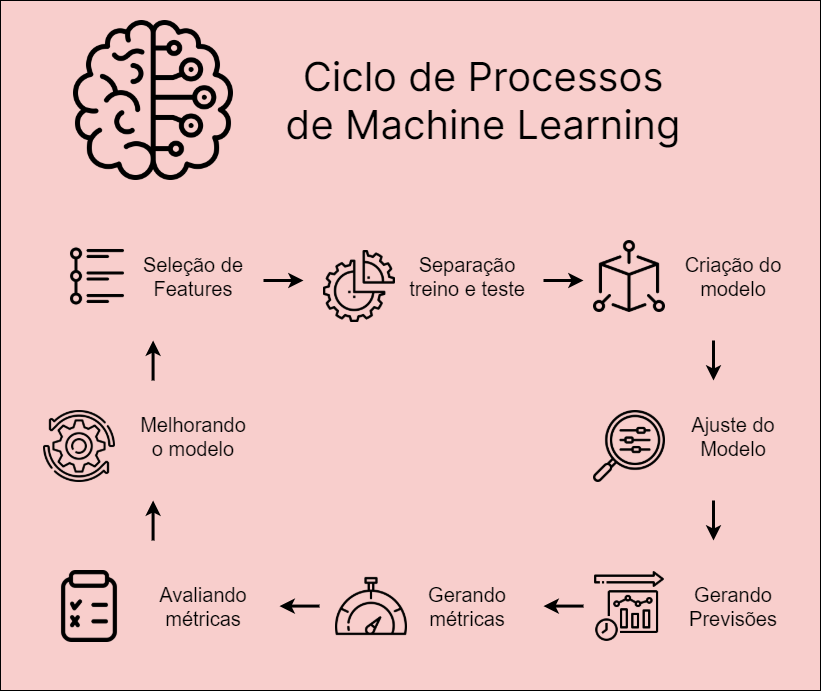

<img src='https://cdn-images-1.medium.com/max/640/1*eeIvlwkMNG1wSmj3FR6M2g.gif'>

## **Preparação dos Dados**

### Variáveis Dummy

In [32]:
dataset.toPandas()

,customerID,unit,usage,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,neighborhood,zone,price,condo,iptu
0,775564-BOJSMVON,Outros,Residencial,0,0,0,1,0,0,0,62,Taquara,Zona Oeste,45000.0,150.0,0.0
1,660895-AUENKNYY,Apartamento,Residencial,1,2,0,1,0,0,0,44,Santíssimo,Zona Oeste,45000.0,120.0,0.0
2,751522-JESYFEQL,Outros,Residencial,0,0,0,0,0,0,0,132,Pedra de Guaratiba,Zona Oeste,50000.0,100.0,0.0
3,568886-ZIBFOMCC,Apartamento,Residencial,2,3,3,1,1,2,4,60,Recreio dos Bandeirantes,Zona Oeste,50000.0,400.0,120.0
4,526755-OBLTYTEN,Outros,Residencial,0,0,0,0,0,0,0,200,Guaratiba,Zona Oeste,50000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69434,134148-MJIBCMDQ,Casa,Residencial,10,5,0,4,1,0,0,1024,Barra da Tijuca,Zona Oeste,10000000.0,2350.0,2900.0
69435,541465-QBQVXXXZ,Casa,Residencial,7,5,0,6,5,0,0,750,Barra da Tijuca,Zona Oeste,10000000.0,3000.0,15000.0
69436,800542-BZREFTQS,Apartamento,Residencial,5,4,0,3,4,0,0,328,Copacabana,Zona Sul,10000000.0,0.0,0.0
69437,939419-ECGUNTIH,Casa,Residencial,10,5,0,4,5,3,0,1024,Barra da Tijuca,Zona Oeste,10000000.0,2400.0,35000.0


In [33]:
dataset \
    .groupBy('customerID') \
    .pivot('unit') \
    .agg(f.lit(1)) \
    .na \
    .fill(0) \
    .show()



+---------------+-----------+----+------+
|     customerID|Apartamento|Casa|Outros|
+---------------+-----------+----+------+
|062130-QKYMWGMV|          1|   0|     0|
|630945-AEEUPRXI|          0|   1|     0|
|994985-OZQNHQKH|          1|   0|     0|
|494674-JWXRZIBM|          1|   0|     0|
|458844-UJCRFSRI|          1|   0|     0|
|155284-BRCDAOIQ|          1|   0|     0|
|396742-DUXBHLRU|          1|   0|     0|
|916072-ZJXARAXO|          1|   0|     0|
|943843-BVTWWHRQ|          1|   0|     0|
|193126-MTNIIFQN|          1|   0|     0|
|319762-UXTTQYFS|          1|   0|     0|
|931151-GZCTKADB|          1|   0|     0|
|103840-OFKPFEZJ|          0|   1|     0|
|176885-NNKZRQGM|          0|   1|     0|
|926638-PBYRAZYR|          1|   0|     0|
|744421-IZJWISWB|          1|   0|     0|
|530012-TYGLQMER|          1|   0|     0|
|209407-GTEUOVKR|          1|   0|     0|
|289667-ZPHGFHJH|          1|   0|     0|
|859388-EYTPMKER|          1|   0|     0|
+---------------+-----------+----+

In [34]:
unit = dataset \
    .groupBy('customerID') \
    .pivot('unit') \
    .agg(f.lit(1)) \
    .na \
    .fill(0)




In [35]:
unit.show()

+---------------+-----------+----+------+
|     customerID|Apartamento|Casa|Outros|
+---------------+-----------+----+------+
|062130-QKYMWGMV|          1|   0|     0|
|630945-AEEUPRXI|          0|   1|     0|
|994985-OZQNHQKH|          1|   0|     0|
|494674-JWXRZIBM|          1|   0|     0|
|458844-UJCRFSRI|          1|   0|     0|
|155284-BRCDAOIQ|          1|   0|     0|
|396742-DUXBHLRU|          1|   0|     0|
|916072-ZJXARAXO|          1|   0|     0|
|943843-BVTWWHRQ|          1|   0|     0|
|193126-MTNIIFQN|          1|   0|     0|
|319762-UXTTQYFS|          1|   0|     0|
|931151-GZCTKADB|          1|   0|     0|
|103840-OFKPFEZJ|          0|   1|     0|
|176885-NNKZRQGM|          0|   1|     0|
|926638-PBYRAZYR|          1|   0|     0|
|744421-IZJWISWB|          1|   0|     0|
|530012-TYGLQMER|          1|   0|     0|
|209407-GTEUOVKR|          1|   0|     0|
|289667-ZPHGFHJH|          1|   0|     0|
|859388-EYTPMKER|          1|   0|     0|
+---------------+-----------+----+

In [36]:
zone = dataset \
    .groupBy('customerID') \
    .pivot('zone') \
    .agg(f.lit(1)) \
    .na \
    .fill(0)



In [37]:
dataset = dataset\
    .join(unit, 'customerID', how='inner') \
    .join(zone, 'customerID', how='inner')

In [38]:
dataset.show()

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+-----------+----+------+------------+----------+----------+--------+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|  price|condo| iptu|Apartamento|Casa|Outros|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+-----------+----+------+------------+----------+----------+--------+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000.0|150.0|  0.0|          0|   0|     1|           0|         0|         1|       0|
|660

In [39]:
from pyspark.ml.feature import VectorAssembler

In [40]:
dataset = dataset.withColumnRenamed('price','label')

In [41]:
X = [
    'bathrooms',
    'bedrooms',
    'parkingSpaces',
    'suites',
    'unitFloor',
    'unitsOnTheFloor',
    'usableAreas',
    'condo',
    'iptu',
    'Apartamento',
    'Casa',
    'Outros',
    'Zona Central',
    'Zona Norte',
    'Zona Oeste',
    'Zona Sul'
]

In [42]:
assembler = VectorAssembler(inputCols = X, outputCol='features')

In [43]:
dataset.show()

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+-----------+----+------+------------+----------+----------+--------+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|  label|condo| iptu|Apartamento|Casa|Outros|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+-----------+----+------+------------+----------+----------+--------+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000.0|150.0|  0.0|          0|   0|     1|           0|         0|         1|       0|
|660

In [44]:
dataset_prep = assembler.transform(dataset).select('features', 'label')

In [45]:
dataset_prep.show(10, False)

+----------------------------------------------------------------------+-------+
|features                                                              |label  |
+----------------------------------------------------------------------+-------+
|(16,[2,6,7,11,14],[1.0,62.0,150.0,1.0,1.0])                           |45000.0|
|(16,[0,1,2,6,7,9,14],[1.0,2.0,1.0,44.0,120.0,1.0,1.0])                |45000.0|
|(16,[6,7,11,14],[132.0,100.0,1.0,1.0])                                |50000.0|
|[2.0,3.0,1.0,1.0,2.0,4.0,60.0,400.0,120.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0]|50000.0|
|(16,[6,11,14],[200.0,1.0,1.0])                                        |50000.0|
|(16,[0,1,2,6,9,13],[1.0,1.0,1.0,33.0,1.0,1.0])                        |45336.0|
|(16,[6,11,14],[120.0,1.0,1.0])                                        |45000.0|
|(16,[6,11,14],[468.0,1.0,1.0])                                        |45000.0|
|(16,[4,6,11,14],[1.0,180.0,1.0,1.0])                                  |50000.0|
|(16,[6,11,14],[128.0,1.0,1.

## **Exploração dos Dados**

In [46]:
from pyspark.ml.stat import Correlation
import pandas as pd


In [47]:
correlacao = Correlation.corr(dataset_prep, 'features').collect()

In [48]:
correlacao

[Row(pearson(features)=DenseMatrix(16, 16, [1.0, 0.6659, 0.4876, 0.7529, 0.0076, -0.1074, 0.5981, 0.02, ..., 0.0088, 0.1803, -0.1833, -0.0165, -0.073, -0.3084, -0.6176, 1.0], False))]

In [49]:
correlacao = Correlation.corr(dataset_prep, 'features').collect()[0][0]

In [50]:
correlacao

DenseMatrix(16, 16, [1.0, 0.6659, 0.4876, 0.7529, 0.0076, -0.1074, 0.5981, 0.02, ..., 0.0088, 0.1803, -0.1833, -0.0165, -0.073, -0.3084, -0.6176, 1.0], False)

<img src='https://media.discordapp.net/attachments/888468711906893834/968929975963119626/unknown.png'>

In [51]:
correlacao.toArray()

array([[ 1.00000000e+00,  6.65910814e-01,  4.87590447e-01,
         7.52927830e-01,  7.62425469e-03, -1.07437445e-01,
         5.98072790e-01,  2.00298945e-02,  1.51023977e-02,
        -2.75457964e-01,  3.43042378e-01, -1.40183420e-01,
        -9.73678190e-02, -1.62497441e-01,  2.42345124e-01,
        -9.87517576e-02],
       [ 6.65910814e-01,  1.00000000e+00,  4.67161260e-01,
         6.01199220e-01, -7.16195849e-03, -1.30814438e-01,
         5.63750247e-01,  1.84819307e-02,  1.36391535e-02,
        -2.58339018e-01,  3.49962189e-01, -2.05607705e-01,
        -1.23732152e-01, -1.11711865e-01,  1.63821698e-01,
        -4.94325200e-02],
       [ 4.87590447e-01,  4.67161260e-01,  1.00000000e+00,
         4.84987652e-01,  3.76755370e-03, -7.45265146e-02,
         4.83731813e-01,  1.80124560e-02,  9.72140387e-03,
        -2.52745585e-01,  2.93325601e-01, -7.23593595e-02,
        -8.64368160e-02, -1.09956571e-01,  2.67989967e-01,
        -1.78806840e-01],
       [ 7.52927830e-01,  6.01199220e

In [52]:
dataframe_correlacao = pd.DataFrame(correlacao.toArray(), columns=X, index=X)

In [53]:
dataframe_correlacao

,bathrooms,bedrooms,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,condo,iptu,Apartamento,Casa,Outros,Zona Central,Zona Norte,Zona Oeste,Zona Sul
bathrooms,1.000000,0.665911,0.487590,0.752928,0.007624,-0.107437,0.598073,0.020030,0.015102,-0.275458,0.343042,-0.140183,-0.097368,-0.162497,0.242345,-0.098752
bedrooms,0.665911,1.000000,0.467161,0.601199,-0.007162,-0.130814,0.563750,0.018482,0.013639,-0.258339,0.349962,-0.205608,-0.123732,-0.111712,0.163822,-0.049433
parkingSpaces,0.487590,0.467161,1.000000,0.484988,0.003768,-0.074527,0.483732,0.018012,0.009721,-0.252746,0.293326,-0.072359,-0.086437,-0.109957,0.267990,-0.178807
suites,0.752928,0.601199,0.484988,1.000000,0.005206,-0.091914,0.577636,0.023461,0.019093,-0.236217,0.282221,-0.088834,-0.084417,-0.230317,0.327546,-0.136398
unitFloor,0.007624,-0.007162,0.003768,0.005206,1.000000,0.092359,-0.012748,0.003065,0.001200,0.034674,-0.031403,-0.013275,0.022315,-0.011112,0.007518,-0.004333
unitsOnTheFloor,-0.107437,-0.130814,-0.074527,-0.091914,0.092359,1.000000,-0.144222,-0.000554,0.005029,0.147497,-0.137754,-0.045523,0.153639,0.030753,-0.012434,-0.055540
usableAreas,0.598073,0.563750,0.483732,0.577636,-0.012748,-0.144222,1.000000,0.019717,0.014656,-0.482170,0.459136,0.125672,-0.075256,-0.158553,0.192466,-0.051962
condo,0.020030,0.018482,0.018012,0.023461,0.003065,-0.000554,0.019717,1.000000,0.226212,0.009105,-0.008624,-0.002495,-0.003553,-0.013453,-0.001055,0.014474
iptu,0.015102,0.013639,0.009721,0.019093,0.001200,0.005029,0.014656,0.226212,1.000000,-0.001502,0.002291,-0.001870,-0.002438,-0.008400,-0.000428,0.008835
Apartamento,-0.275458,-0.258339,-0.252746,-0.236217,0.034674,0.147497,-0.482170,0.009105,-0.001502,1.000000,-0.932270,-0.313032,0.034073,0.010312,-0.176033,0.180288


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

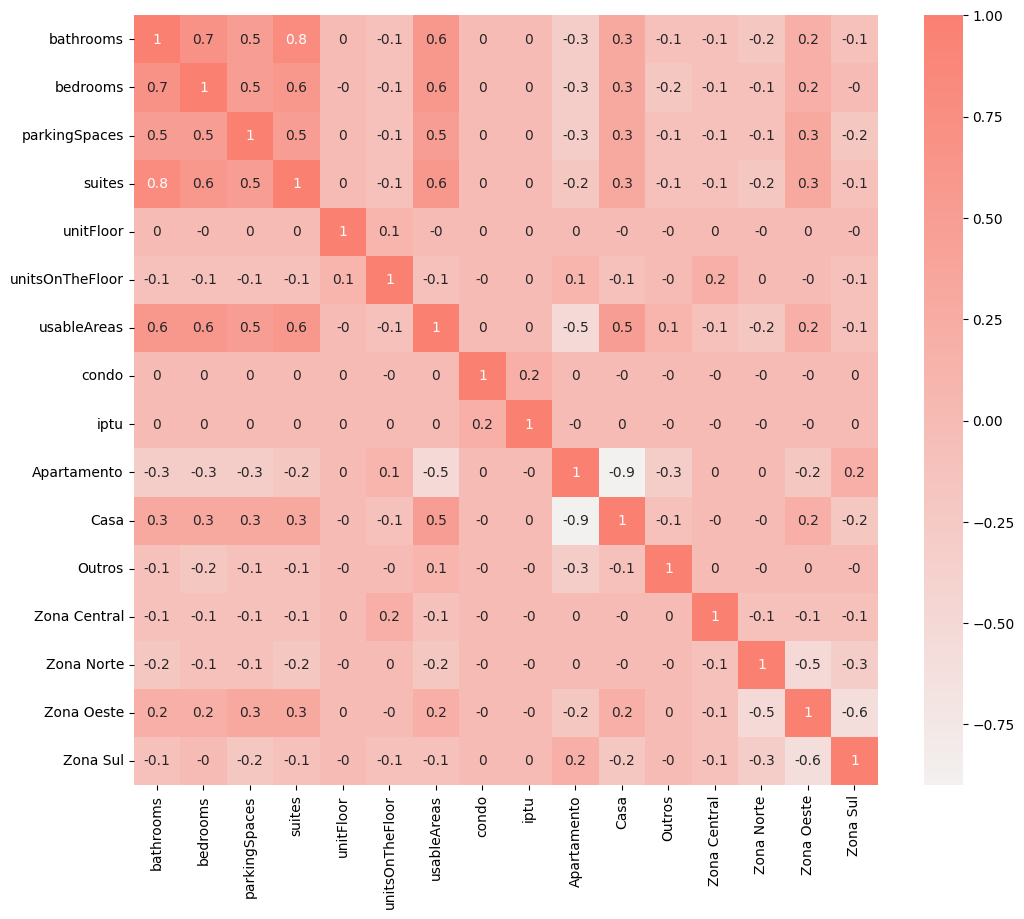

In [55]:
plt.figure(figsize=(12, 10))
paleta = sns.color_palette("light:salmon", as_cmap=True)
sns.heatmap(dataframe_correlacao.round(1), annot=True, cmap=paleta)

## **Ajuste e Previsão**

<font size=2>**Documentação:**</font>
<font size=2>[randomSplit](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.randomSplit.html)</font> |
<font size=2>[LinearRegression](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.LinearRegression.html)</font>

In [56]:
from pyspark.ml.regression import LinearRegression

In [57]:
treino, teste = dataset_prep.randomSplit([0.7, 0.3], seed= 101)

In [58]:
treino.count()


48528

In [59]:
teste.count()

20911

In [60]:
lr = LinearRegression()

In [61]:
modelo_lr = lr.fit(treino)

In [62]:
previsoes_lr_treino = modelo_lr.transform(treino)

In [63]:
previsoes_lr_treino.show(truncate=False)

+------------------------------------------------------------------+--------+------------------+
|features                                                          |label   |prediction        |
+------------------------------------------------------------------+--------+------------------+
|(16,[0,1,2,3,4,5,6,9,12],[1.0,3.0,1.0,1.0,19.0,19.0,31.0,1.0,1.0])|260000.0|456912.5961697208 |
|(16,[0,1,2,3,4,5,6,9,12],[2.0,3.0,1.0,2.0,14.0,8.0,70.0,1.0,1.0]) |500000.0|1137441.5392757843|
|(16,[0,1,2,3,4,5,6,9,13],[1.0,1.0,1.0,1.0,3.0,6.0,34.0,1.0,1.0])  |308615.0|109051.8660183156 |
|(16,[0,1,2,3,4,5,6,9,13],[1.0,1.0,1.0,1.0,14.0,10.0,43.0,1.0,1.0])|279000.0|114340.4856617591 |
|(16,[0,1,2,3,4,5,6,9,13],[1.0,2.0,2.0,1.0,7.0,8.0,103.0,1.0,1.0]) |350000.0|615212.676391388  |
|(16,[0,1,2,3,4,5,6,9,13],[1.0,3.0,1.0,1.0,3.0,12.0,70.0,1.0,1.0]) |449000.0|413629.1770314037 |
|(16,[0,1,2,3,4,5,6,9,13],[1.0,3.0,1.0,1.0,7.0,6.0,66.0,1.0,1.0])  |479000.0|461886.3682530006 |
|(16,[0,1,2,3,4,5,6,9,13],[2.0

## **Métricas**

In [64]:
resumo_treino = modelo_lr.summary

In [65]:
resumo_treino.r2

0.6616968194171355

In [66]:
resumo_treino.rootMeanSquaredError

806492.4235236342

In [67]:
resumo_teste = modelo_lr.evaluate(teste)

In [68]:
resumo_teste.r2

0.6674158454368638

In [69]:
resumo_teste.rootMeanSquaredError

809817.0411690151

### **Tabela Resumo Regressão Linear**

In [70]:
print('Linear Regression')
print("="*30)
print("Dados de Treino")
print("="*30)
print("R²: %f" % resumo_treino.r2)
print("RMSE: %f" % resumo_treino.rootMeanSquaredError)
print("")
print("="*30)
print("Dados de Teste")
print("="*30)
print("R²: %f" % resumo_teste.r2)
print("RMSE: %f" % resumo_teste.rootMeanSquaredError)


Linear Regression
Dados de Treino
R²: 0.661697
RMSE: 806492.423524

Dados de Teste
R²: 0.667416
RMSE: 809817.041169


# **Aula 3 - Árvore de Decisão - Regressão**

## **O Modelo**


<img src='https://raw.githubusercontent.com/pedrohcmds/alura_testes/main/Árvore%20de%20Decisão%20-%20Regressão%20(2).gif'>

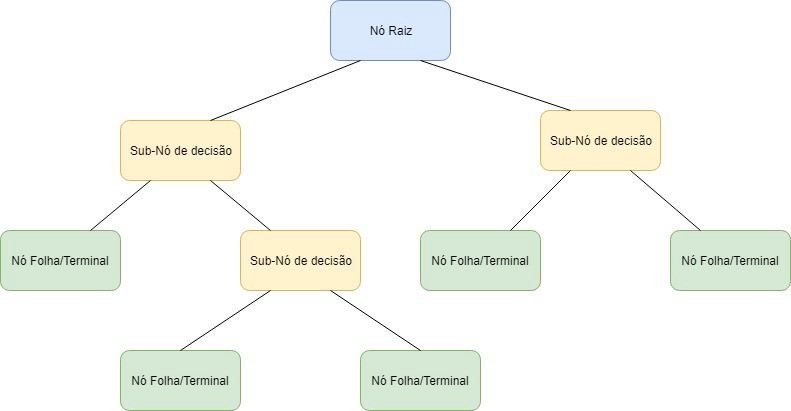

## **Ajuste e Previsão**


<font size=2>**Documentação:**</font>
<font size=2>[DecisionTreeRegressor](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.DecisionTreeRegressor.html)</font>

In [71]:
from pyspark.ml.regression import DecisionTreeRegressor

In [74]:
dtr = DecisionTreeRegressor(seed=101, maxDepth=7)

In [75]:
modelo_dtr = dtr.fit(treino)

In [76]:
previsoes_dtr_treino = modelo_dtr.transform(treino)

In [77]:
previsoes_dtr_treino.show()

+--------------------+--------+-----------------+
|            features|   label|       prediction|
+--------------------+--------+-----------------+
|(16,[0,1,2,3,4,5,...|260000.0|372388.3193512304|
|(16,[0,1,2,3,4,5,...|500000.0|558941.2148790177|
|(16,[0,1,2,3,4,5,...|308615.0|372388.3193512304|
|(16,[0,1,2,3,4,5,...|279000.0|372388.3193512304|
|(16,[0,1,2,3,4,5,...|350000.0|837204.8880597015|
|(16,[0,1,2,3,4,5,...|449000.0|558941.2148790177|
|(16,[0,1,2,3,4,5,...|479000.0|372388.3193512304|
|(16,[0,1,2,3,4,5,...|420000.0|558941.2148790177|
|(16,[0,1,2,3,4,5,...|265000.0|558941.2148790177|
|(16,[0,1,2,3,4,5,...|650000.0|751220.6673948662|
|(16,[0,1,2,3,4,5,...|379900.0|372388.3193512304|
|(16,[0,1,2,3,4,5,...|333000.0|372388.3193512304|
|(16,[0,1,2,3,4,5,...|340000.0|558941.2148790177|
|(16,[0,1,2,3,4,5,...|896000.0|558941.2148790177|
|(16,[0,1,2,3,4,5,...|430000.0|558941.2148790177|
|(16,[0,1,2,3,4,5,...|190000.0|372388.3193512304|
|(16,[0,1,2,3,4,5,...|273944.0|372388.3193512304|


## **Métricas**

<font size=2>**Documentação:**</font>
<font size=2>[RegressionEvaluator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.RegressionEvaluator.html)</font>

In [78]:
from pyspark.ml.evaluation import RegressionEvaluator

In [79]:
evaluator = RegressionEvaluator()

print(evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName:"r2"}))
print(evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName:"rmse"}))

0.790434688984831
634756.1970312257


In [80]:
previsoes_dtr_teste = modelo_dtr.transform(teste)

In [81]:
previsoes_dtr_teste.show()

+--------------------+---------+------------------+
|            features|    label|        prediction|
+--------------------+---------+------------------+
|(16,[0,1,2,3,4,5,...| 545000.0| 372388.3193512304|
|(16,[0,1,2,3,4,5,...| 199000.0| 372388.3193512304|
|(16,[0,1,2,3,4,5,...| 780000.0| 751220.6673948662|
|(16,[0,1,2,3,4,5,...| 459600.0| 372388.3193512304|
|(16,[0,1,2,3,4,5,...| 948000.0| 751220.6673948662|
|(16,[0,1,2,3,4,5,...| 300000.0| 372388.3193512304|
|(16,[0,1,2,3,4,5,...| 620000.0| 558941.2148790177|
|(16,[0,1,2,3,4,5,...| 371700.0| 372388.3193512304|
|(16,[0,1,2,3,4,5,...| 880000.0| 558941.2148790177|
|(16,[0,1,2,3,4,5,...| 439000.0| 558941.2148790177|
|(16,[0,1,2,3,4,5,...| 679000.0| 837204.8880597015|
|(16,[0,1,2,3,4,5,...| 919600.0| 837204.8880597015|
|(16,[0,1,2,3,4,5,...| 950000.0| 837204.8880597015|
|(16,[0,1,2,3,4,5,...|1299500.0|1232979.7891621129|
|(16,[0,1,2,3,4,5,...|1400000.0|1232979.7891621129|
|(16,[0,1,2,3,4,5,...|1180000.0|1232979.7891621129|
|(16,[0,1,2,

In [82]:
print('Decision Tree Regression')
print("="*30)
print("Dados de Treino")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: "rmse"}))
print("")
print("="*30)
print("Dados de Teste")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: "rmse"}))


Decision Tree Regression
Dados de Treino
R²: 0.790435
RMSE: 634756.197031

Dados de Teste
R²: 0.775325
RMSE: 665600.935067


# **Aula 4 - Random Forest - Regressão**

## **O Modelo**

### Random Forest

<img src='https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif'>

## **Ajuste e Previsão**

<font size=2>**Documentação:**</font>
<font size=2>[RandomForestRegressor](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.RandomForestRegressor.html)</font>

In [83]:
from pyspark.ml.regression import RandomForestRegressor

In [84]:
rfr = RandomForestRegressor(seed=101, maxDepth=7, numTrees=10)

In [85]:
modelo_rfr = rfr.fit(treino)

Exception ignored in: <function JavaWrapper.__del__ at 0x7bcf5f253d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pyspark/ml/wrapper.py", line 53, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'DecisionTreeRegressor' object has no attribute '_java_obj'


In [86]:
previsoes_rfr_treino = modelo_rfr.transform(treino)

In [87]:
previsoes_rfr_treino.show()

+--------------------+--------+------------------+
|            features|   label|        prediction|
+--------------------+--------+------------------+
|(16,[0,1,2,3,4,5,...|260000.0|398315.94135299063|
|(16,[0,1,2,3,4,5,...|500000.0|485633.94186776725|
|(16,[0,1,2,3,4,5,...|308615.0|  334343.261436792|
|(16,[0,1,2,3,4,5,...|279000.0|  334343.261436792|
|(16,[0,1,2,3,4,5,...|350000.0| 842156.6641292966|
|(16,[0,1,2,3,4,5,...|449000.0|484969.15459718334|
|(16,[0,1,2,3,4,5,...|479000.0| 398733.7395891266|
|(16,[0,1,2,3,4,5,...|420000.0| 561094.8043753305|
|(16,[0,1,2,3,4,5,...|265000.0| 459124.1396237624|
|(16,[0,1,2,3,4,5,...|650000.0| 594971.8301353009|
|(16,[0,1,2,3,4,5,...|379900.0|417577.17941418843|
|(16,[0,1,2,3,4,5,...|333000.0|417577.17941418843|
|(16,[0,1,2,3,4,5,...|340000.0| 459124.1396237624|
|(16,[0,1,2,3,4,5,...|896000.0|497577.26022434514|
|(16,[0,1,2,3,4,5,...|430000.0|497577.26022434514|
|(16,[0,1,2,3,4,5,...|190000.0|417577.17941418843|
|(16,[0,1,2,3,4,5,...|273944.0|

## **Métricas**

In [88]:
print(evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "r2"}))
print(evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "rmse"}))

0.8045457079914831
613013.243656012


In [89]:
previsoes_rfr_teste = modelo_rfr.transform(teste)

In [90]:
previsoes_rfr_teste.show()

+--------------------+---------+------------------+
|            features|    label|        prediction|
+--------------------+---------+------------------+
|(16,[0,1,2,3,4,5,...| 545000.0|  339306.629068714|
|(16,[0,1,2,3,4,5,...| 199000.0|  334343.261436792|
|(16,[0,1,2,3,4,5,...| 780000.0| 651712.8656955198|
|(16,[0,1,2,3,4,5,...| 459600.0|417577.17941418843|
|(16,[0,1,2,3,4,5,...| 948000.0| 527257.3452118817|
|(16,[0,1,2,3,4,5,...| 300000.0|417577.17941418843|
|(16,[0,1,2,3,4,5,...| 620000.0|497577.26022434514|
|(16,[0,1,2,3,4,5,...| 371700.0|417577.17941418843|
|(16,[0,1,2,3,4,5,...| 880000.0|514621.71187698934|
|(16,[0,1,2,3,4,5,...| 439000.0|486239.72025455657|
|(16,[0,1,2,3,4,5,...| 679000.0| 842156.6641292966|
|(16,[0,1,2,3,4,5,...| 919600.0| 845438.4989764296|
|(16,[0,1,2,3,4,5,...| 950000.0| 864260.4159718944|
|(16,[0,1,2,3,4,5,...|1299500.0|  1240153.93005062|
|(16,[0,1,2,3,4,5,...|1400000.0|1454371.0201299915|
|(16,[0,1,2,3,4,5,...|1180000.0|1454371.0201299915|
|(16,[0,1,2,

In [91]:
print('Random Forest Regression')
print("="*30)
print("Dados de Treino")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "rmse"}))
print("")
print("="*30)
print("Dados de Teste")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "rmse"}))


Random Forest Regression
Dados de Treino
R²: 0.804546
RMSE: 613013.243656

Dados de Teste
R²: 0.796709
RMSE: 633133.848125


# **Aula 5 - Técnicas de Otimização**

## **Ferramentas**

### Cross Validation

<img src='https://miro.medium.com/max/1400/1*kkMtezwv8qj1t9uG4nw_8g.png'>

## **Árvore de Decisão com Cross Validation**

<font size=2>**Documentação:**</font>
<font size=2>[CrossValidator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.CrossValidator.html)</font> |
<font size=2>[ParamGridBuilder](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.ParamGridBuilder.html)</font>

In [92]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator


In [93]:
dtr = DecisionTreeRegressor()

In [94]:
grid = ParamGridBuilder() \
    .addGrid(dtr.maxDepth, [2, 5, 10]) \
    .addGrid(dtr.maxBins, [10, 32, 45]) \
    .build()

In [95]:
evaluator = RegressionEvaluator()

In [96]:
dtr_cv = CrossValidator(
    estimator=dtr,
    estimatorParamMaps=grid,
    evaluator = evaluator,
    numFolds=3,
    seed = 101
)

In [97]:
modelo_dtr_cv = dtr_cv.fit(treino)

In [100]:
previsoes_dtr_cv_teste = modelo_dtr_cv.transform(teste)

In [101]:
print('Decision Tree Regression')
print("="*30)
print("Sem Cross Validation")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: "rmse"}))
print("")
print("="*30)
print("Com Cross Validation")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_dtr_cv_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_dtr_cv_teste, {evaluator.metricName: "rmse"}))


Decision Tree Regression
Sem Cross Validation
R²: 0.775325
RMSE: 665600.935067

Com Cross Validation
R²: 0.785565
RMSE: 650255.339022


## **Random Forest com Cross Validation**


In [102]:
from pyspark.ml.regression import RandomForestRegressor

In [103]:
rfr = RandomForestRegressor()

In [105]:
grid = ParamGridBuilder() \
    .addGrid(rfr.numTrees, [10, 20, 30]) \
    .addGrid(rfr.maxDepth, [5, 10]) \
    .addGrid(rfr.maxBins, [10, 32, 45]) \
    .build()

In [106]:
evaluator = RegressionEvaluator()

In [107]:
rfr_cv = CrossValidator(
    estimator=rfr,
    estimatorParamMaps=grid,
    evaluator= evaluator,
    numFolds=3
)

In [108]:
modelo_rfr_cv = rfr_cv.fit(treino)

In [109]:
previsoes_rfr_cv_teste = modelo_rfr_cv.transform(teste)

In [110]:
print('Random Forest Regression')
print("="*30)
print("Sem Cross Validation")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "rmse"}))
print("")
print("="*30)
print("Com Cross Validation")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_rfr_cv_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_rfr_cv_teste, {evaluator.metricName: "rmse"}))


Random Forest Regression
Sem Cross Validation
R²: 0.796709
RMSE: 633133.848125

Com Cross Validation
R²: 0.829092
RMSE: 580520.708181


### **Processos de Machine Learning**
::

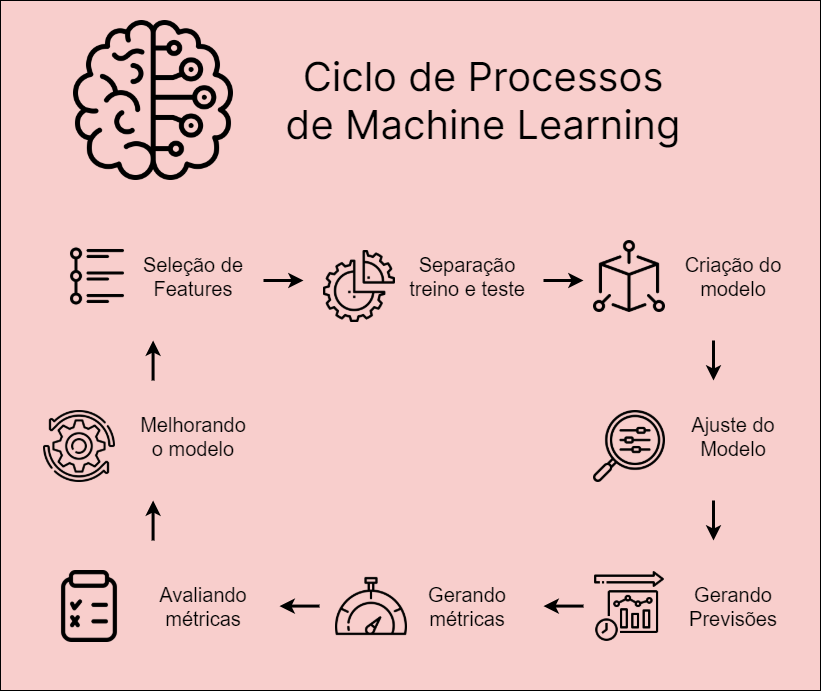

##Prevendo Resultados com o Melhor modelo

In [111]:
novo_imovel = [{
    'bathrooms': 3,
    'bedrooms': 3,
    'floors': 2,
    'parkingSpaces': 2,
    'suites': 1,
    'unitFloor': 0,
    'unitsOnTheFloor': 0,
    'usableAreas': 150,
    'condo': 0,
    'iptu': 65,
    'Apartamento': 0,
    'Casa': 1,
    'Outros': 0,
    'Zona Central': 0,
    'Zona Norte': 1,
    'Zona Oeste': 0,
    'Zona Sul': 0,
    'label': 0

}]

In [113]:
meu_imovel = spark.createDataFrame(novo_imovel)

In [114]:
meu_imovel.show()

+-----------+----+------+------------+----------+----------+--------+---------+--------+-----+------+----+-----+-------------+------+---------+---------------+-----------+
|Apartamento|Casa|Outros|Zona Central|Zona Norte|Zona Oeste|Zona Sul|bathrooms|bedrooms|condo|floors|iptu|label|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|
+-----------+----+------+------------+----------+----------+--------+---------+--------+-----+------+----+-----+-------------+------+---------+---------------+-----------+
|          0|   1|     0|           0|         1|         0|       0|        3|       3|    0|     2|  65|    0|            2|     1|        0|              0|        150|
+-----------+----+------+------------+----------+----------+--------+---------+--------+-----+------+----+-----+-------------+------+---------+---------------+-----------+



In [115]:
assembler = VectorAssembler(inputCols=X, outputCol='features')

In [116]:
meu_imovel_vetorizado= assembler.transform(meu_imovel).select('features', 'label')

In [117]:
meu_imovel_vetorizado.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(16,[0,1,2,3,6,8,...|    0|
+--------------------+-----+



In [118]:
modelo_rfr_cv.transform(meu_imovel_vetorizado).show()

+--------------------+-----+-----------------+
|            features|label|       prediction|
+--------------------+-----+-----------------+
|(16,[0,1,2,3,6,8,...|    0|732711.9578596115|
+--------------------+-----+-----------------+



## **Conclusão**